In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
from d00_utils.db_utils import dbReadWriteClean, dbReadWriteViews
io_clean = dbReadWriteClean()
io_views = dbReadWriteViews()

/home/ubuntu/anaconda3/envs/yoni/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
measurement_abstract_rpt_df = io_clean.get_table("measurement_abstract_rpt")
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568351, 5)


,studyidk,measabstractnumber,name,value,unitname
0,2882,2,(P1/2t)AVM,2.491754,cm2
1,2882,12,Area TSVI,3.606348,cm2
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
4,2882,125,P1/2t VM,88.291224,ms


In [6]:
instances_w_labels_df = io_views.get_table('instances_w_labels')
instances_w_labels_df = instances_w_labels_df[(instances_w_labels_df['view']=='a2c') | (instances_w_labels_df['view']=='a4c')]
print(instances_w_labels_df.shape)
instances_w_labels_df.head()

(13478, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
1,1.2.840.113663.1500.1.365900332.3.7.20120703.9...,8Z0BWZGH,696112,a4c,39531
5,1.2.840.113663.1500.1.365900332.3.12.20120704....,8ZGVB5TY,696426,a4c,39552
6,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVB7C1,696430,a2c,39552
7,1.2.840.113663.1500.1.365900332.3.4.20120704.1...,8ZGVCN6C,696438,a4c,39553
8,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVCPFW,696467,a2c,39553


In [7]:
frames_by_volume_mask_df = io_views.get_table('frames_by_volume_mask')
print(frames_by_volume_mask_df.shape)
frames_by_volume_mask_df.head()

(72527, 9)


,instanceidk,indexinmglist,studyidk,frame,view_name,view_exists,view_only,ventricle_only,cycle_only
0,57164,1,2882,15,a4c_ven_ed,t,a4c,ven,ed
1,58207,1,2966,8,a4c_ven_ed,t,a4c,ven,ed
2,102950,0,5898,17,a4c_ven_ed,t,a4c,ven,ed
3,105943,1,6085,62,a4c_ven_ed,t,a4c,ven,ed
4,105951,0,6086,7,a4c_ven_ed,t,a4c,ven,ed


In [8]:
a_measgraphref_df = io_clean.get_table("a_measgraphref")
print(a_measgraphref_df.shape)
a_measgraphref_df.head()

/home/ubuntu/anaconda3/envs/yoni/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(858255, 10)


,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,2882,187,0,57164,0,28.242271,0,,,
1,2882,188,0,57164,0,7.897812,0,,,
2,2882,189,0,57164,0,85.725750,0,,,
3,2882,190,0,57164,0,87.190031,0,,,
4,2882,191,0,57164,1,36.654466,0,,,


In [9]:
def get_recommendation(row):
    return 'normal' if row['value'] >= 60 else 'abnormal' if row['value'] <= 40 else 'greyzone'

In [10]:
merge_df = measurement_abstract_rpt_df[['studyidk', 'measabstractnumber', 'name']]
merge_df = merge_df.merge(a_measgraphref_df, on=['studyidk', 'measabstractnumber'])
merge_df = merge_df[['studyidk', 'instanceidk', 'indexinmglist', 'meassequence', 'name', 'value', 'howentered']]
print(merge_df.shape)
merge_df.head()

(858255, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
0,2882,57164,0,0,AVIts ap4,28.242271,0
1,2882,57164,0,0,DVIts ap4,7.897812,0
2,2882,57164,0,0,VTS(el-ps4),85.725750,0
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
4,2882,57164,1,0,AVItd ap4,36.654466,0


In [11]:
start_df = merge_df
filter_df = start_df

In [12]:
filter_df = filter_df[filter_df['name'].str.contains('ps4')]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

858255
70173
0.08176241326878375


In [13]:
filter_df['name'].value_counts()

VTD(MDD-ps4)       18234
VTS(MDD-ps4)       17767
VTD(el-ps4)        17217
VTS(el-ps4)        16778
VolAI(MDD-ps4)       153
VTD(MDD-ps4)esf       12
VTS(MDD-ps4)esf       12
Name: name, dtype: int64

In [14]:
filter_df = filter_df[filter_df['name'].isin(['VTD(MDD-ps4)', 'VTS(MDD-ps4)'])]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

858255
36001
0.041946740770516924


In [15]:
filter_df.head()

,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
7,2882,57164,1,0,VTD(MDD-ps4),134.335580,0
31,2966,58207,0,0,VTS(MDD-ps4),131.242087,0
35,2966,58207,1,0,VTD(MDD-ps4),250.321472,0
84,5898,102950,0,0,VTD(MDD-ps4),292.888669,0


In [16]:
diastole_df = filter_df[filter_df['name'].str.contains('VTD')]
print(diastole_df.shape)
diastole_df.head()

(18234, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
7,2882,57164,1,0,VTD(MDD-ps4),134.335580,0
35,2966,58207,1,0,VTD(MDD-ps4),250.321472,0
84,5898,102950,0,0,VTD(MDD-ps4),292.888669,0
139,6085,105943,1,0,VTD(MDD-ps4),107.762018,0
145,6086,105951,0,0,VTD(MDD-ps4),160.243074,0


In [17]:
systole_df = filter_df[filter_df['name'].str.contains('VTS')]
print(systole_df.shape)
systole_df.head()

(17767, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
31,2966,58207,0,0,VTS(MDD-ps4),131.242087,0
88,5898,102950,1,0,VTS(MDD-ps4),204.461602,0
135,6085,105943,0,0,VTS(MDD-ps4),60.694028,0
149,6086,105951,1,0,VTS(MDD-ps4),69.452834,0


In [18]:
diastole_df['value'].describe()

count    18234.000000
mean       101.024065
std         42.791743
min          0.000000
25%         71.971405
50%         92.508786
75%        119.856817
max        718.944686
Name: value, dtype: float64

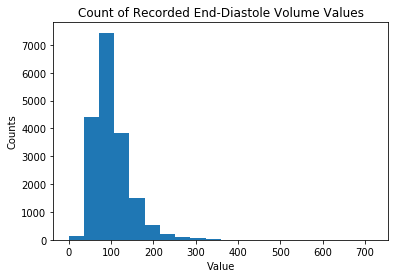

In [19]:
plt.title(f'Count of Recorded End-Diastole Volume Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(diastole_df['value'], bins=20);

In [20]:
systole_df['value'].describe()

count    17767.000000
mean        43.831547
std         31.048670
min          0.000000
25%         24.808539
50%         35.458103
75%         51.942356
max        627.923352
Name: value, dtype: float64

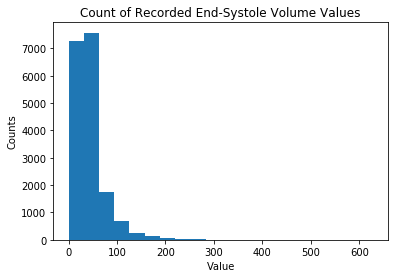

In [21]:
plt.title(f'Count of Recorded End-Systole Volume Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(systole_df['value'], bins=20);

In [22]:
both_df = diastole_df.merge(systole_df, on=['studyidk', 'instanceidk'], suffixes=['_diastole', '_systole'])
print(both_df.shape)
both_df.head()

(17868, 12)


,studyidk,instanceidk,indexinmglist_diastole,meassequence_diastole,name_diastole,value_diastole,howentered_diastole,indexinmglist_systole,meassequence_systole,name_systole,value_systole,howentered_systole
0,2882,57164,1,0,VTD(MDD-ps4),134.335580,0,0,0,VTS(MDD-ps4),87.190031,0
1,2966,58207,1,0,VTD(MDD-ps4),250.321472,0,0,0,VTS(MDD-ps4),131.242087,0
2,5898,102950,0,0,VTD(MDD-ps4),292.888669,0,1,0,VTS(MDD-ps4),204.461602,0
3,6085,105943,1,0,VTD(MDD-ps4),107.762018,0,0,0,VTS(MDD-ps4),60.694028,0
4,6086,105951,0,0,VTD(MDD-ps4),160.243074,0,1,0,VTS(MDD-ps4),69.452834,0


In [23]:
len(both_df.groupby(['studyidk', 'instanceidk']).count())

17472

In [ ]:
filter_df = filter_df[filter_df['studyidk'].isin(frames_by_volume_mask_df['studyidk'].unique())]
print(filter_df.shape)
print(len(filter_df)/len(merge_df))

In [32]:
filter_df = filter_df[filter_df['studyidk'].isin(instances_w_labels_df['studyidk'].unique())]
print(filter_df.shape)
print(len(filter_df)/len(merge_df))

(335842, 7)


In [38]:
len(filter_df.groupby['studyidk'].unique())

7969

In [39]:
len(filter_df['instanceidk'].unique())

8178

In [40]:
len((filter_df['studyidk'].astype(str) + '_' + filter_df['instanceidk'].astype(str)).unique())

8235

In [41]:
filter_df['name'].value_counts()

VTD(MDD-ps4)    8237
VTD(el-ps4)     8180
VTS(MDD-ps4)    8022
VTS(el-ps4)     7964
Name: name, dtype: int64

In [42]:
filter_df['howentered'].value_counts()

0    32288
4      115
Name: howentered, dtype: int64

In [43]:
filter_df.groupby(['studyidk', 'instanceidk', 'indexinmglist']).agg({'name': list})

name
studyidk instanceidk indexinmglist                             
39531    696112      0              [VTS(el-ps4), VTS(MDD-ps4)]
                     1              [VTD(el-ps4), VTD(MDD-ps4)]
39552    696426      0              [VTD(el-ps4), VTD(MDD-ps4)]
                     1              [VTS(el-ps4), VTS(MDD-ps4)]
39553    696438      0              [VTD(el-ps4), VTD(MDD-ps4)]
...                                                         ...
126794   3004420     1              [VTS(el-ps4), VTS(MDD-ps4)]
126796   3004494     0              [VTD(el-ps4), VTD(MDD-ps4)]
                     1              [VTS(el-ps4), VTS(MDD-ps4)]
         3004496     0              [VTD(el-ps4), VTD(MDD-ps4)]
                     1              [VTS(el-ps4), VTS(MDD-ps4)]

[16202 rows x 1 columns]